**Dizziness Detector model Building**

In [1]:
# import data maniplation libraries
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import warnings
import tensorflow
# import deep learning tools
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow import keras

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# set the seed value for experiment reproductivit:ensure the same randomness all time
seed = 1842
tensorflow.random.set_seed(seed)
np.random.seed(seed)

# Turn off warnings for cleaner notebook
warnings.simplefilter('ignore')

In [4]:
#unzip images
path_to_zip_file="/content/drive/MyDrive/DeepLearningProjects/DizzinessDetector/Datasets/cleaned_images.zip"
directory_to_extract_to = "/content"

import zipfile
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)
 

In [5]:
image_generator=ImageDataGenerator(rescale=1/255)

# define image dataset
train_dataset=image_generator.flow_from_directory(batch_size=32,
                                                    directory="/content/Training",
                                                    shuffle=True,
                                                    target_size=(224,224),
                                                    subset="training",
                                                    class_mode="categorical")
validation_dataset=image_generator.flow_from_directory(batch_size=32,
                                                    directory="/content/Validation",
                                                    shuffle=True,
                                                    target_size=(224,224),
                              
                                                    class_mode="categorical")

Found 498 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [ ]:
# Show some images for the first batch
batch_1_img=train_dataset[0]
for i in range(0,32):
      img=batch_1_img[0][i]
      lab=batch_1_img[1][i]
      plt.imshow(img)
      plt.title(lab)
      plt.axis("off")
      plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
model = keras.Sequential([
   keras.layers.Conv2D(32, 3, activation='relu', input_shape=(224,224,3)),
   
   keras.layers.Conv2D(32, 3, activation='relu'),
   keras.layers.Flatten(),
   keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])
callback=keras.callbacks.EarlyStopping(monitor="val_loss",
                                       patience=3,
                                       restore_best_weights=True)

In [ ]:

model.fit(train_dataset,epochs=30,validation_data=validation_dataset,callbacks=callback)

Transfer Learning





In [29]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [30]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,rotation_range=40,
                                   shear_range = 0.2,
                                   height_shift_range = 0.2,
                                   width_shift_range = 0.2,
                                   fill_mode = "nearest",
                                   horizontal_flip =True,
                                   zoom_range = 0.2,
                                   

)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [31]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory("/content/Training",
                                                 target_size = (224,224),
                                                 batch_size = 15,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory("/content/Validation",
                                            target_size = (224,224),
                                            batch_size = 15,
                                            class_mode = 'categorical')

Found 498 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [ ]:
# Import the  vgg16 library as shown below and add preprocessing layer to the front of resnet50
# Here we will be using imagenet weights
# re-size all the images to this
IMAGE_SIZE = [224,224]

vgg =  VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [ ]:
prediction = Dense(2,activation="softmax")(x)

# create a model object
model = Model(inputs=vgg.input,outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

In [ ]:
# tell the model what cost and optimization method to use
optimizer = keras.optimizers.Adam(lr = 0.01)
model.compile(
  loss='categorical_crossentropy',
  optimizer= optimizer ,
  metrics=['accuracy']
)

In [ ]:
# fit the model
callback=keras.callbacks.EarlyStopping(monitor="val_loss",
                                       patience=3,
                                       restore_best_weights=True)
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  callbacks=callback
    
)

Epoch 1/50
34/34 [==============================] - 7s 203ms/step - loss: 4.3764 - accuracy: 0.7590 - val_loss: 2.1668 - val_accuracy: 0.8875
Epoch 2/50
34/34 [==============================] - 7s 192ms/step - loss: 1.7226 - accuracy: 0.8655 - val_loss: 1.1275 - val_accuracy: 0.9375
Epoch 3/50
34/34 [==============================] - 7s 192ms/step - loss: 0.6086 - accuracy: 0.9157 - val_loss: 1.0819 - val_accuracy: 0.9000
Epoch 4/50
34/34 [==============================] - 7s 193ms/step - loss: 0.8720 - accuracy: 0.9157 - val_loss: 0.8242 - val_accuracy: 0.8875
Epoch 5/50
34/34 [==============================] - 7s 194ms/step - loss: 1.3839 - accuracy: 0.8855 - val_loss: 2.0552 - val_accuracy: 0.9125
Epoch 6/50
34/34 [==============================] - 7s 193ms/step - loss: 0.7223 - accuracy: 0.9197 - val_loss: 1.4671 - val_accuracy: 0.8875
Epoch 7/50
34/34 [==============================] - 7s 194ms/step - loss: 1.4346 - accuracy: 0.9116 - val_loss: 1.8345 - val_accuracy: 0.8500


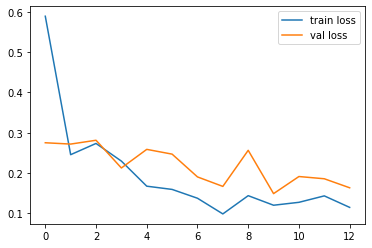

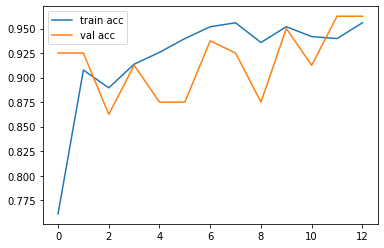

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss') 
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
loss,accuracy=model.evaluate(test_set)
print("loss",loss)
print("Accuracy",accuracy)
# Not bad ,the accuracy hangs around % 94%

6/6 [==============================] - 1s 78ms/step - loss: 0.1484 - accuracy: 0.9500
loss 0.148385152220726
Accuracy 0.949999988079071


In [ ]:
os.chdir("/content/drive/MyDrive/DeepLearningProjects/DizzinessDetector/Models")


In [ ]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('vgg16_first.h5')

**Increase number of epochs and adjusting moniotor call back **

In [ ]:
# fit the model
callback=keras.callbacks.EarlyStopping(monitor="val_loss",
                                       patience=5,
                                       restore_best_weights=True)
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=60,
  callbacks=callback
    
)

Epoch 1/60
34/34 [==============================] - 7s 197ms/step - loss: 0.1426 - accuracy: 0.9418 - val_loss: 0.2863 - val_accuracy: 0.8500
Epoch 2/60
34/34 [==============================] - 7s 195ms/step - loss: 0.1138 - accuracy: 0.9498 - val_loss: 0.5373 - val_accuracy: 0.8000
Epoch 3/60
34/34 [==============================] - 7s 195ms/step - loss: 0.2476 - accuracy: 0.9116 - val_loss: 0.2632 - val_accuracy: 0.9500
Epoch 4/60
34/34 [==============================] - 7s 208ms/step - loss: 0.2236 - accuracy: 0.9277 - val_loss: 0.1980 - val_accuracy: 0.9375
Epoch 5/60
34/34 [==============================] - 7s 193ms/step - loss: 0.0863 - accuracy: 0.9739 - val_loss: 0.2709 - val_accuracy: 0.8875
Epoch 6/60
34/34 [==============================] - 7s 193ms/step - loss: 0.1018 - accuracy: 0.9618 - val_loss: 0.2507 - val_accuracy: 0.9125
Epoch 7/60
34/34 [==============================] - 8s 236ms/step - loss: 0.0930 - accuracy: 0.9558 - val_loss: 0.2530 - val_accuracy: 0.8875
Epoch 

In [ ]:
loss,accuracy=model.evaluate(test_set)
print("loss",loss)
print("Accuracy",accuracy)
# Not bad ,the accuracy hangs around % 94%

6/6 [==============================] - 1s 77ms/step - loss: 0.1980 - accuracy: 0.9375
loss 0.1980321854352951
Accuracy 0.9375


In [6]:
# load model

model = keras.models.load_model("/content/drive/MyDrive/DeepLearningProjects/DizzinessDetector/Models/vgg16_first.h5")


In [32]:
# check model accuracy on validation data
validation_images=[]
validation_labels=[]
for i in range(len(validation_dataset)):
  batch=validation_dataset[i]
  for j in range(len(batch[0])):
    validation_images.append(batch[0][j])
    validation_labels.append(batch[1][j])

validation_images=np.array(validation_images)
validation_labels=np.array(validation_labels)
len(validation_labels)

80

In [33]:
# get correct class label
lab = []
for prob in validation_labels:
  lab.append(np.argmax(prob))
lab = np.array(lab)
len(lab)

80

In [34]:
preds = model.predict(validation_dataset)

In [35]:
# get predicted class
cls = []
for prob in preds:
  cls.append(np.argmax(prob))
cls = np.array(cls)
len(cls)


80

In [49]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(lab, cls)
print("Accuracy:",accuracy_score(lab,cls))
cm

Accuracy: 0.95


array([[39,  1],
       [ 3, 37]])

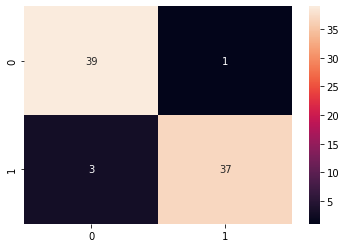

In [38]:
import seaborn as sns
sns.heatmap(cm, annot=True)

[9.9946946e-01 5.3056946e-04]


'Alert!! Driver is inactive'

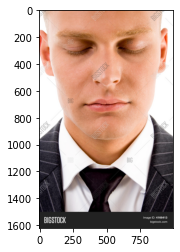

In [44]:
# Make prediction on single image
from PIL import Image
import numpy as np
from skimage import transform
def load(filename):
   np_image = Image.open(filename)
   image = np.array(np_image).astype('float32')/255
   image = transform.resize(image, (224, 224, 3))
   image = np.expand_dims(image, axis=0)
   return image,plt.imshow(np_image)

image,x = load('/content/new_open.jpg')
def predict_(img):
  pred = model.predict(img)
  probability = pred[0]
  if probability[0] > probability[1]:
    conf = probability[0]
    print(probability)
    if conf >= 0.9:
      return "Alert!! Driver is inactive"
    else:
      return None
  else:
    return None


predict_(image)

**FINE TUNING**

In [ ]:
# unfreeze some layers
set_train = False
for layer in vgg.layers:
  if layer.name in ["blorck5_conv1"]:
    set_train = True
  if set_train:
    layer.trainable = True
  else:
    layer.trainable = False

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [ ]:
prediction = Dense(2,activation="softmax")(x)

# create a model object
model = Model(inputs=vgg.input,outputs=prediction)

In [ ]:
model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

In [ ]:
  # tell the model what cost and optimization method to use 
optimizer = keras.optimizers.Adam(lr = 0.01)
model.compile(
  loss='categorical_crossentropy',
  optimizer=optimierz,
  metrics=['accuracy']
)

In [ ]:
# fit the model
callback=keras.callbacks.EarlyStopping(monitor="val_loss",
                                       patience=4,
                                       restore_best_weights=True)
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  callbacks=callback
    
)

Epoch 1/50
34/34 [==============================] - 7s 200ms/step - loss: 0.6533 - accuracy: 0.6104 - val_loss: 0.6896 - val_accuracy: 0.6875
Epoch 2/50
34/34 [==============================] - 7s 195ms/step - loss: 0.6402 - accuracy: 0.6466 - val_loss: 0.6064 - val_accuracy: 0.6375
Epoch 3/50
34/34 [==============================] - 7s 193ms/step - loss: 0.6931 - accuracy: 0.5964 - val_loss: 0.5695 - val_accuracy: 0.7125
Epoch 4/50
34/34 [==============================] - 7s 194ms/step - loss: 0.7129 - accuracy: 0.6165 - val_loss: 0.5558 - val_accuracy: 0.7500
Epoch 5/50
34/34 [==============================] - 7s 194ms/step - loss: 0.6529 - accuracy: 0.6627 - val_loss: 0.5549 - val_accuracy: 0.7125
Epoch 6/50
34/34 [==============================] - 7s 192ms/step - loss: 0.6364 - accuracy: 0.6486 - val_loss: 0.5279 - val_accuracy: 0.7875
Epoch 7/50
34/34 [==============================] - 8s 232ms/step - loss: 0.6124 - accuracy: 0.6546 - val_loss: 0.5458 - val_accuracy: 0.7375
Epoch 